In [1]:
import numpy as np
from numpy import matlib
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate Random Data

Generate data for each class which follows a Gaussian Distribution. The setup is for a 2-Class classifier

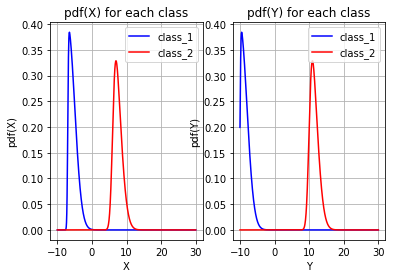

In [2]:
# create a gaussian plot
a_1 = 10 # skew, when skew = 0, distribution is a normal distribution
loc_1 = -10 # shift (mean)
scale_1 = 2 # scale  (std dev)

a_2 = 3 # skew, when skew = 0, distribution is a normal distribution
loc_2 = 10 # shift (mean)
scale_2 = 2 # scale  (std dev)

# generate the distribution
class_1x = stats.skewnorm(a_1, loc_1+3, scale_1)
class_2x = stats.skewnorm(a_2, loc_2-4, scale_2)

class_1y = stats.skewnorm(a_1, loc_1, scale_1)
class_2y = stats.skewnorm(a_2, loc_2, scale_2)

x_span = np.linspace(-10, 30, 1000)
x1 = class_1x.pdf(x_span)
x2 = class_2x.pdf(x_span)

y_span = np.linspace(-10, 30, 1000)
y1 = class_1y.pdf(y_span)
y2 = class_2y.pdf(y_span)

# plot the pdf for the y feature
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(x_span, x1, 'b')
plt.plot(x_span, x2, 'r')
plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.title('pdf(X) for each class')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(y_span, y1, 'b')
plt.plot(y_span, y2, 'r')
plt.xlabel('Y')
plt.ylabel('pdf(Y)')
plt.title('pdf(Y) for each class')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

# Generate Sample Points

Sample the distribution and plot data samples.

Estimated a = 0.0119522860665, loc = 1.57413367086, scale = 9.95264308494


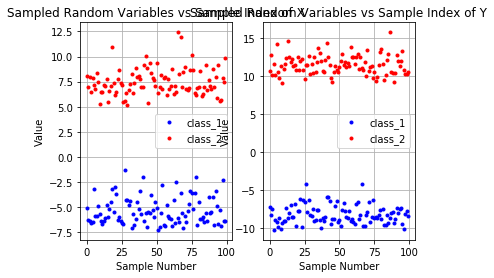

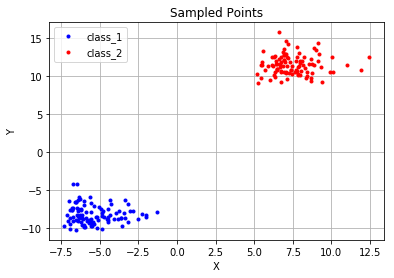

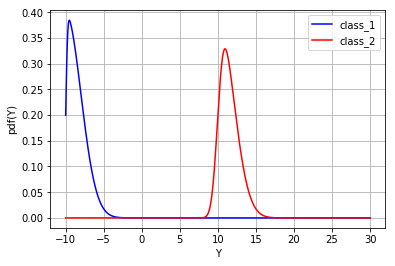

In [3]:
# sample a few points
n_points = 100
x1_samp = class_1x.rvs(n_points)
x2_samp = class_2x.rvs(n_points)

y1_samp = class_1y.rvs(n_points)
y2_samp = class_2y.rvs(n_points)

# plot the drawn samples
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(range(n_points), x1_samp, 'b.')
plt.plot(range(n_points), x2_samp, 'r.')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.title('Sampled Random Variables vs Sample Index of X')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(range(n_points), y1_samp, 'b.')
plt.plot(range(n_points), y2_samp, 'r.')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.title('Sampled Random Variables vs Sample Index of Y')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

# plot sample points
plt.figure()
plt.plot(x1_samp, y1_samp, 'b.')
plt.plot(x2_samp, y2_samp, 'r.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Points')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

# estimate parameters from samples
a_est, loc_est, scale_est = stats.skewnorm.fit([y1_samp, y2_samp])

plt.figure()
plt.plot(y_span, y1, 'b')
plt.plot(y_span, y2, 'r')
#plt.plot(y_span, stats.skewnorm.pdf(x, a_est, loc_est, scale_est), 'g')
plt.xlabel('Y')
plt.ylabel('pdf(Y)')
plt.grid()
plt.legend(['class_1', 'class_2', 'est'], loc='best')
print('Estimated a = {}, loc = {}, scale = {}'.format(a_est, loc_est, scale_est))

# Compute Statistics

In [4]:
# compute prior
num_class_c1 = np.size(x1_samp)
num_class_c2 = np.size(x2_samp)

c1_prior = 1.0 * num_class_c1 / (num_class_c1 + num_class_c2)
c2_prior = 1.0 * num_class_c2 / (num_class_c1 + num_class_c2)

# if prior is zero, set to really small number instead to avoid dividing by zero
c1_prior = (1e-6 if c1_prior == 0 else c1_prior)
c2_prior = (1e-6 if c2_prior == 0 else c2_prior)

# get sample mean and cov
c1_samp = np.array([x1_samp, y1_samp])
c2_samp = np.array([x2_samp, y2_samp])

c1_samp_mean = np.mean(c1_samp, axis=1)
c2_samp_mean = np.mean(c2_samp, axis=1)

c1_samp_cov = np.cov(c1_samp)
c2_samp_cov = np.cov(c2_samp)

c1_samp_cov_inv = np.linalg.inv(c1_samp_cov)
c2_samp_cov_inv = np.linalg.inv(c2_samp_cov)

c1_samp_cov_det = np.linalg.det(c1_samp_cov)
c2_samp_cov_det = np.linalg.det(c2_samp_cov)

c_min = np.min(np.concatenate((c1_samp, c2_samp), axis=1), axis=1)
c_max = np.max(np.concatenate((c1_samp, c2_samp), axis=1), axis=1)

#print('c1_samp = {}'.format(c1_samp))
#print('c2_samp = {}'.format(c2_samp))
print('num_class_c1 = {}'.format(num_class_c1))
print('num_class_c2 = {}'.format(num_class_c2))

print('c1_prior = {}'.format(c1_prior))
print('c2_prior = {}'.format(c2_prior))

print('c_min = {}'.format(c_min))
print('c_max = {}'.format(c_max))

print('c1_samp_mean = {}'.format(c1_samp_mean))
print('c2_samp_mean = {}'.format(c2_samp_mean))
print('c1_samp_cov = {}'.format(c1_samp_cov))
print('c2_samp_cov = {}'.format(c2_samp_cov))
print('c1_samp_cov_inv = {}'.format(c1_samp_cov_inv))
print('c2_samp_cov_inv = {}'.format(c2_samp_cov_inv))
print('c1_samp_cov_det = {}'.format(c1_samp_cov_det))
print('c2_samp_cov_det = {}'.format(c2_samp_cov_det))

num_class_c1 = 100
num_class_c2 = 100
c1_prior = 0.5
c2_prior = 0.5
c_min = [ -7.28655125 -10.2457956 ]
c_max = [12.42389978 15.81478957]
c1_samp_mean = [-5.35850505 -8.2046908 ]
c2_samp_mean = [ 7.48337659 11.5427717 ]
c1_samp_cov = [[ 1.82398358 -0.10852396]
 [-0.10852396  1.47946959]]
c2_samp_cov = [[1.8039884  0.06912824]
 [0.06912824 1.66302038]]
c1_samp_cov_inv = [[0.55065382 0.04039227]
 [0.04039227 0.67888082]]
c2_samp_cov_inv = [[ 0.55521167 -0.02307898]
 [-0.02307898  0.60227488]]
c1_samp_cov_det = 2.6867507861
c2_samp_cov_det = 2.99529076606


In [5]:
num_points = 100
[X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))

X = np.array((X1.flatten(), X2.flatten())).T

# compute the discriminant function
_X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)
_X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)
_M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )
_M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )

# compute the likelihood ratio
det_ratio = np.log(1.0 * c1_samp_cov_det / c2_samp_cov_det)

# compute the prior
prior_term = 2 * np.log(1.0 * c2_prior / c1_prior)

discriminant = _M1 - _M2 + prior_term + det_ratio

print(_X1)
print(_X2)
print(_M1)
print(_M2)
print('det_ratio: {}'.format(det_ratio))
print('prior_term: {}'.format(prior_term))
print('discriminant: {}'.format(discriminant))
_M1.shape

[[-1.9280462  -2.04110481]
 [-1.72895073 -2.04110481]
 [-1.52985527 -2.04110481]
 ...
 [17.38421391 24.01948037]
 [17.58330937 24.01948037]
 [17.78240484 24.01948037]]
[[-14.76992784 -21.78856731]
 [-14.57083238 -21.78856731]
 [-14.37173691 -21.78856731]
 ...
 [  4.54233226   4.27201787]
 [  4.74142773   4.27201787]
 [  4.94052319   4.27201787]]
[  5.19318602   4.75943086   4.36933043 ... 591.81636001 596.03626862
 600.29983196]
[392.19048656 389.14738867 386.14830686 ...  21.5514689   22.53843774
  23.56942265]
det_ratio: -0.108708733357
prior_term: 0.0
discriminant: [-387.10600927 -384.49666655 -381.88768516 ...  570.15618238  573.38912215
  576.62170058]


(10000,)

(array([   0,    1,    2, ..., 6003, 6100, 6101]),)
(10000,)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 2)
(10000, 2)


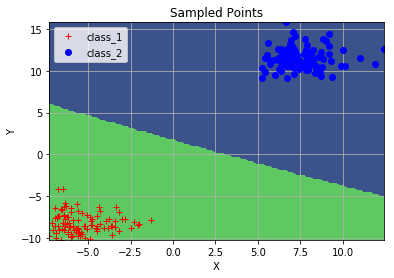

In [6]:
I = np.where(discriminant <= 0)
print(I)


print(discriminant.shape)
out = np.zeros((num_points, num_points))

I = np.unravel_index(I, (out.shape))

#out [discriminant <= 0] = 1
out[I] = 1
print(out)

print(_X1.shape)
print(_X2.shape)


# plot sample points
plt.figure()
plt.plot(x1_samp, y1_samp, 'r+')
plt.plot(x2_samp, y2_samp, 'bo')
plt.contourf(X1, X2, out, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Points')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

In [7]:
import nengo
from nengo_extras.gui import image_function, image_display_function

In [8]:
    def make_plot_node(self, domain, lines=1, n_pts=20, function=None,
                       max_x=None, min_x=None, max_y=1, min_y=-1):
        """Generate a Node with a custom HTML GUI plot. The node takes in a set
        of weights and generates a line plot of the represented function through
        weighted summation of the basis functions"""

        #TODO: min and max y are wonky, something goes wrong when they're not the same
        # possibly plotting backwards

        if domain.squeeze().ndim != 1:
            raise Exception('Domain must be 1-dimensional')

        indices = None
        if len(domain) > n_pts:
            indices = np.linspace(0, len(domain) - 1, n_pts).astype(int)
            domain = domain[indices]
        elif n_pts > len(domain):
            n_pts = len(domain)

        basis = self.basis[indices] if indices is not None else self.basis
        max_x = max_x if max_x is not None else np.max(domain)
        min_x = min_x if min_x is not None else np.min(domain)

        svg_x = (domain - min_x) * 100 / (max_x - min_x)

        colors = ["#1c73b3", "#039f74", "#d65e00",
                  "#cd79a7", "#f0e542", "#56b4ea"]

        def plot_func(t, x):
            paths = []
            for i in range(lines):
                # weighted summation to calculate the represented function
                value = x[i*self.n_basis:(i+1)*self.n_basis]
                data = np.dot(value, basis.T) * self.scale
                # scale the function by min_y and max_y, * 100 for svg plot
                data = (-data - min_y) * 100 / (max_y - min_y)

                # turn the data into a string for svg plotting
                path = []
                for j in range(len(data)):
                    path.append('%1.0f %1.0f' % (svg_x[j], data[j]))
                paths.append('<path d="M%s" fill="none" stroke="%s"/>' %
                             ('L'.join(path), colors[i % len(colors)]))

            plot_func._nengo_html_ = '''
            <svg width="100%%" height="100%%" viewbox="0 0 100 100">%s</svg>
            ''' % (''.join(paths))
        plot_func._nengo_html_ = ''
        return nengo.Node(plot_func,
                          size_in=self.n_basis * lines,
                          size_out=0,
                          label='Function plot node')

In [9]:
# Support functions
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

def sample_distribution(t, n_points=1):
    x = class_1x.rvs(n_points)
    y = class_1y.rvs(n_points)
    
    return np.append(x, y)

def compute_discriminant(t, x):
    X1 = x - c1_samp_mean
    X2 = x - c2_samp_mean
    M1 = np.sum(np.multiply(np.matmul(X1, c1_samp_cov_inv), X1))
    M2 = np.sum(np.multiply(np.matmul(X2, c1_samp_cov_inv), X2))
    
    discriminant = M1 - M2 + prior_term + det_ratio
    return discriminant

def compute_boundary(t, test_sample):
    [X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))

    X = np.array((X1.flatten(), X2.flatten())).T

    # compute the discriminant function
    _X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)
    _X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)
    _M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )
    _M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )

    # compute the likelihood ratio
    det_ratio = np.log(1.0 * c1_samp_cov_det / c1_samp_cov_det)

    # compute the prior
    prior_term = 2 * np.log(1.0 * c2_prior / c1_prior)

    discriminant = _M1 - _M2 + prior_term + det_ratio
    
    # generate plot
    I = np.where(discriminant <= 0)
    out = np.zeros((num_points, num_points))
    I = np.unravel_index(I, (out.shape))
    out[I] = 1

    # plot sample points
    fig = Figure()
    canvas = FigureCanvas(fig)
    ax = fig.gca()
    ax.plot(x1_samp, y1_samp, 'r+')
    ax.plot(x2_samp, y2_samp, 'bo')
    ax.plot(test_sample[0], test_sample[1], 'm*')
    ax.contourf(X1, X2, out, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Sampled Points')
    ax.grid()
    ax.legend(['class_1', 'class_2', 'test_sample'], loc='best')

    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()

    # convert matplot to np image
    X = np.fromstring(s, np.uint8).reshape((height, width, 4))
    img = np.transpose(X, (2,0,1))

    # flatten image into a single vector
    X = img.flatten()

    # normalize image between 0 and 1
    X = 1.0 * X / np.max(X)
    return X

'''
    u = nengo.Node(X)
    #u = nengo.Node(nengo.processes.PresentInput([X], 0.1))
    display_f = image_display_function((3, 300, 350)) # set size to be (channel, height, width)
    #display_f = image_display_function(image.size + (3,))
    display_node = nengo.Node(display_f, size_in=u.size_out)
    nengo.Connection(u, display_node, synapse=None)
'''

'''
[X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))

X = np.array((X1.flatten(), X2.flatten())).T

# compute the discriminant function
_X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)
_X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)
_M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )
_M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )

# compute the likelihood ratio
det_ratio = np.log(1.0 * c1_samp_cov_det / c1_samp_cov_det)

# compute the prior
prior_term = 2 * np.log(1.0 * c2_prior / c1_prior)

discriminant = _M1 - _M2 + prior_term + det_ratio
'''


'\n[X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))\n\nX = np.array((X1.flatten(), X2.flatten())).T\n\n# compute the discriminant function\n_X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)\n_X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)\n_M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )\n_M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )\n\n# compute the likelihood ratio\ndet_ratio = np.log(1.0 * c1_samp_cov_det / c1_samp_cov_det)\n\n# compute the prior\nprior_term = 2 * np.log(1.0 * c2_prior / c1_prior)\n\ndiscriminant = _M1 - _M2 + prior_term + det_ratio\n'

In [10]:
disc_out0 = compute_discriminant(10, [-7, -10])
print(disc_out0)

disc_out1 = compute_discriminant(10, [6, 10])
print(disc_out1)

print('sign 0: {}'.format(np.sign(disc_out0)))
print('sign 1: {}'.format(np.sign(disc_out1)))

-451.9766710283245
309.6147563281962
sign 0: -1.0
sign 1: 1.0


In [11]:
model = nengo.Network('Bayes Classifier')

with model:
    # obtain sample points
    #input_samples = nengo.Node(sample_distribution)
    input_samples = nengo.Node([0, 0])
    
    discriminant = nengo.Node(compute_discriminant, size_in=2, size_out=1)
    
    output = nengo.Ensemble(10, 1)
    
    nengo.Connection(input_samples, discriminant)
    nengo.Connection(discriminant, output, function=lambda x: np.sign(x))
    
    boundary = nengo.Node(compute_boundary, size_in=2)
    nengo.Connection(input_samples, boundary, synapse=None)
    
    display_f = image_display_function((4, 288, 432)) # set size to be (channel, height, width)
    display_node = nengo.Node(display_f, size_in=boundary.size_out)
    nengo.Connection(boundary, display_node, synapse=None)

/home/turtlebot/.virtualenvs/turtlebot/lib/python2.7/site-packages/ipykernel_launcher.py:63: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [12]:
# View Model
from nengo_gui.ipython import IPythonViz
IPythonViz(model)